In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Datasets

In [2]:
from datasets import list_datasets

all_datasets = list_datasets()

In [4]:
print(f'Total datasets available: {len(all_datasets)}')
print(f'Few datasets are: \n{all_datasets[:10]}')

Total datasets available: 10000
Few datasets are: 
['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


#### Loading a dataset

In [7]:
from datasets import load_dataset

In [10]:
emotions = load_dataset("SetFit/emotion")

Using custom data configuration SetFit--emotion-89147fdf376d67e2


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--emotion-89147fdf376d67e2/0.0.0/da492aad5680612e4028e7f6ddc04b1dfcec4b64db470ed7cc5f2bb265b9b6b5. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

- Like a python dictionary. We have 3 key-value pairs corresponding to train, test and validation.
- The values are of dataset class

In [12]:
train = emotions['train']
train

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 16000
})

In [13]:
train.shape

(16000, 3)

In [14]:
train[0]

{'text': 'i didnt feel humiliated', 'label': 0, 'label_text': 'sadness'}

In [16]:
train[:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3],
 'label_text': ['sadness', 'sadness', 'anger']}

In [17]:
# We can select rows of spcific columns as well
train['text'][:3]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong']

- We can convert our datasets to pandas dataframe format for analysis and visualization.
- This does not change the underlying data format (apache arrow table).
- We can easily convert back to datasets format if required.

In [19]:
emotions.set_format(type='pandas')
df = emotions['train'][:]

In [21]:
df.head(3)

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger


Text(0.5, 0, 'Number of rows')

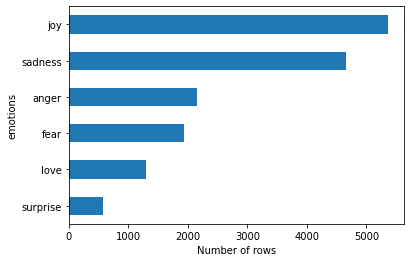

In [34]:
# plot class distribution
df.label_text.value_counts(ascending=True).plot(kind='barh')
plt.ylabel('emotions')
plt.xlabel('Number of rows')

Text(0.5, 0.98, '')

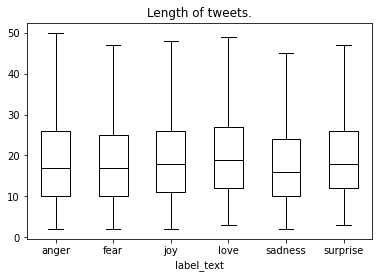

In [47]:
# Distribution of tweet lengths
df['text_len'] = df['text'].str.split().apply(len)
df.boxplot(column='text_len', by='label_text', grid=False, showfliers=False, color='black')
plt.title('Length of tweets.')
plt.suptitle("")

In [48]:
# reset format
emotions.reset_format()

### Tokenization